# Predict the Price of Bitcoin - Time Series Analysis Project
Weekly challenge: Week 09  
Date: 9/19/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data file

In [3]:
df = pd.read_csv(r'C:\Users\unpat\_Projects\Challenge_AProjectAWeek\Week_09/bitcoin_price_Training - Training.csv')

In [4]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [5]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [15]:
df = df.sort_index()

In [17]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [18]:
# For time series analysis, date must be row index
# Setting the Date as index
df.set_index('Date', inplace = True)

In [19]:
df.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


## Exploratory Data Analysis

In [20]:
# Creating a copy of the data
data = df.copy()

In [21]:
data.head(3)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


We want to predict the closing price so we will analyze the 'Close' variable

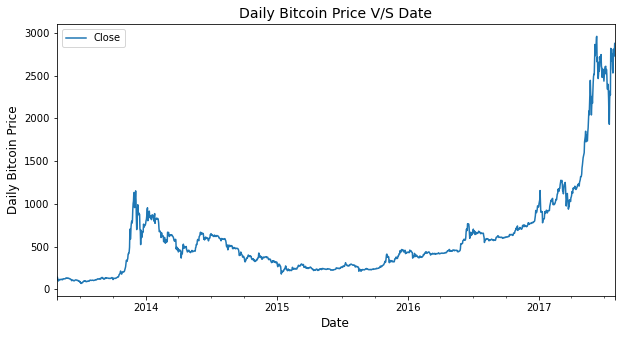

In [33]:
plt.figure(figsize=(10,5))
data['Close'].plot()

plt.ylabel('Daily Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

* We can see that around the end of 2013 and beginning of 2014, there are huge spikes in the price.  
* Price also has spiked around middle of 2017.

In [35]:
# Store the closing price in a new series data2
data2 = data['Close']

In [36]:
data2.head(3)

Date
2017-07-31    2875.34
2017-07-30    2757.18
2017-07-29    2726.45
Name: Close, dtype: float64

## Resampling the data

In [37]:
# Resampling the 'Close' variable data on 'week'
data2.resample('W').sum()

Date
2013-04-28      134.21
2013-05-05      831.90
2013-05-12      797.48
2013-05-19      830.97
2013-05-26      894.13
                ...   
2017-07-09    17984.69
2017-07-16    15629.11
2017-07-23    17846.60
2017-07-30    18825.21
2017-08-06     2875.34
Freq: W-SUN, Name: Close, Length: 224, dtype: float64

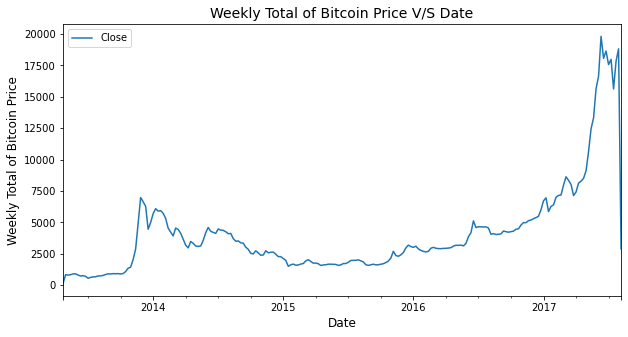

In [39]:
# Weekly
plt.figure(figsize=(10,5))
data2.resample('W').sum().plot()

plt.ylabel('Weekly Total of Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Weekly Total of Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

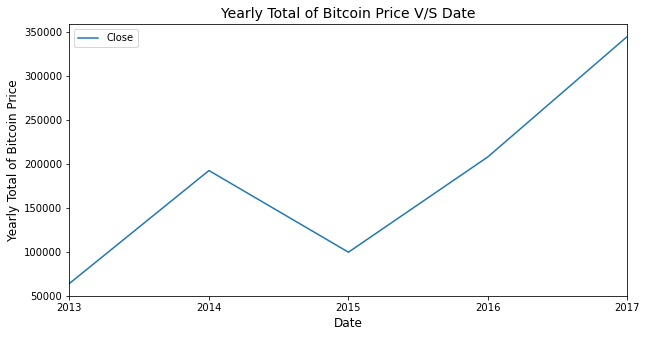

In [40]:
# Yearly
plt.figure(figsize=(10,5))
data2.resample('Y').sum().plot()

plt.ylabel('Yearly Total of Bitcoin Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Yearly Total of Bitcoin Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()

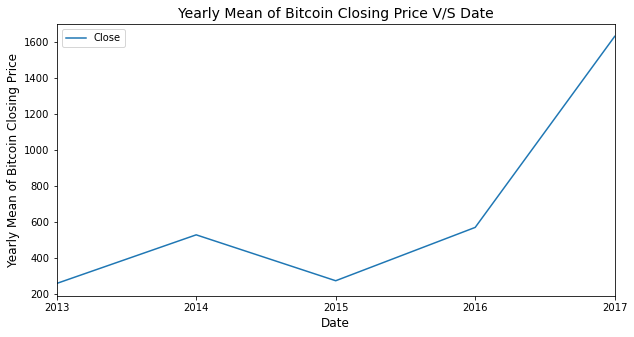

In [41]:
# mean closing - Yearly
plt.figure(figsize=(10,5))
data2.resample('Y').mean().plot()

plt.ylabel('Yearly Mean of Bitcoin Closing Price', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Yearly Mean of Bitcoin Closing Price V/S Date', fontsize=14)
plt.legend(loc = 2)
plt.show()